# 概要
## モンテカルロ方とは
- 乱数を使った数値計算手法
- 領域の変数を確率から求めることができる

### 例
- 円の面積
- π/4 = 0.785(ドットが領域に入る確率)
- 以上からπが推測できる

## モンテカルロステップ(MCS)
- 乱数をとる回数
- 点数を増えていくと確率的に解析解に漸近していく
- 必ず解析解に近ずくわけではないことに注意する

# ライブラリインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
from IPython.html.widgets import  interact
plt.style.use("ggplot")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings('ignore') # warningが出ないように設定
pd.set_option("display.max_rows", None) # pandasの表示上限をなくす
pd.set_option("display.max_columns", None) # pandasの表示上限をなくす 

/Users/yoshidayuusei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# サンプル確認

## データを生成

In [2]:
# 乱数の固定
np.random.seed(123)

In [3]:
# 乱数の個数
NMC = 100

In [4]:
# x, y座標の乱数の生成
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)

## 確率を計算

In [5]:
# 原点からの座標の距離
r = (xmc**2 + ymc**2) ** 0.5

In [6]:
# 領域に入ったか入っていないかを判定
accept = np.where(r<=1, 1, 0)

In [7]:
# 指定した領域に入ったかの確率
accept_ratio = np.sum(accept) / NMC

In [8]:
accept_ratio

0.82

# 可視化する

## データ準備

In [9]:
NMC = 2000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)

## 可視化関数定義

In [10]:
@interact(mcs=(0, NMC, 1))

def animation(mcs=0):
    plt.figure(figsize=(6, 6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    x = np.arange(0, 1, 0.001)# 円
    y = (1 - x ** 2) ** 0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x, y)
    
    #　領域を塗りつぶす
    plt.fill_between(x, y, alpha=0.3)
    plt.fill_between(x, y, y2, alpha=0.3)
    
    r = (xmc[:mcs]**2 + ymc[:mcs]**2) ** 0.5

    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    
    plt.scatter(xmc[:mcs], ymc[:mcs], color="black")
    plt.show()
    
    print("Monte Carlo: ", accept_ratio)
    print("Analytical Solution: ", np.pi/4.0)

interactive(children=(IntSlider(value=0, description='mcs', max=2000), Output()), _dom_classes=('widget-intera…

In [11]:
pi_mcs = []
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)

for mcs in range(1, NMC):
    r = (xmc[:mcs]**2 + ymc[:mcs]**2) ** 0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    pi_mcs.append(accept_ratio)

In [12]:
pi_x = np.arange(len(pi_mcs)) + 1

Text(0,0.5,'sccept ration')

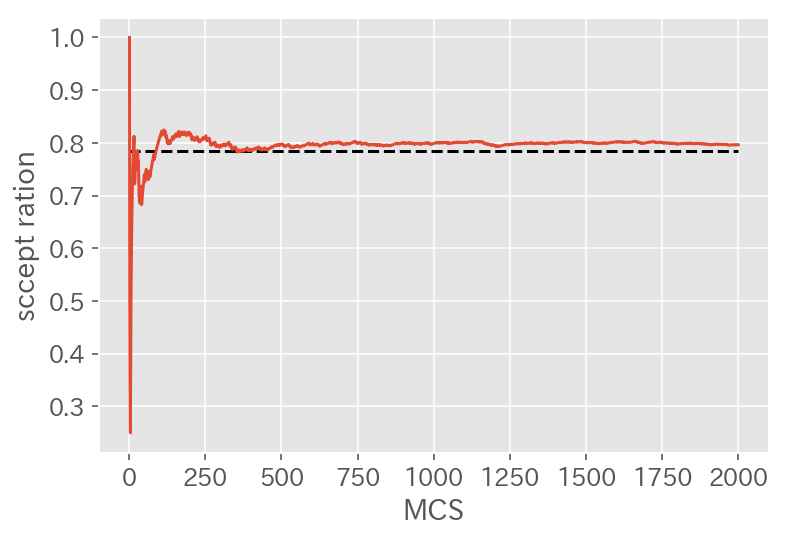

In [13]:
plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyles="dashed")
plt.xlabel("MCS")
plt.ylabel("sccept ration")